In [1]:
# 📌 Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [10]:
dataset_dir = "C:/Users/neela/OneDrive/Desktop/JaiShreeRam/real_vs_fake/real-vs-fake"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "valid")
test_dir = os.path.join(dataset_dir, "test")

In [ ]:
# Define image size and batch size
image_size = (128, 128)
batch_size = 32

In [18]:

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [19]:

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [20]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [21]:
def build_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        keras.layers.MaxPooling2D(2, 2),

        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),

        keras.layers.Conv2D(128, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid")  # Binary Classification
    ])
    
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

In [22]:
model = build_model()
model.summary()

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 792s 253ms/step - accuracy: 0.6739 - loss: 0.5904 - val_accuracy: 0.8323 - val_loss: 0.3743
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 609s 195ms/step - accuracy: 0.8461 - loss: 0.3541 - val_accuracy: 0.8830 - val_loss: 0.2758
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 414s 133ms/step - accuracy: 0.9007 - loss: 0.2427 - val_accuracy: 0.9134 - val_loss: 0.2170
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 873s 279ms/step - accuracy: 0.9268 - loss: 0.1836 - val_accuracy: 0.9312 - val_loss: 0.1786
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 506s 162ms/step - accuracy: 0.9415 - loss: 0.1478 - val_accuracy: 0.9362 - val_loss: 0.1694
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 431s 138ms/step - accuracy: 0.9542 - loss: 0.1195 - val_accuracy: 0.9381 - val_loss: 0.1681
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 589s 189ms/step - accuracy: 0.9609 - loss: 0.0991 - val_accuracy: 0.9439 - val_loss: 0.1644
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 887s 284ms/step - ac

In [23]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.9440 - loss: 0.1666
Test Accuracy: 0.9444


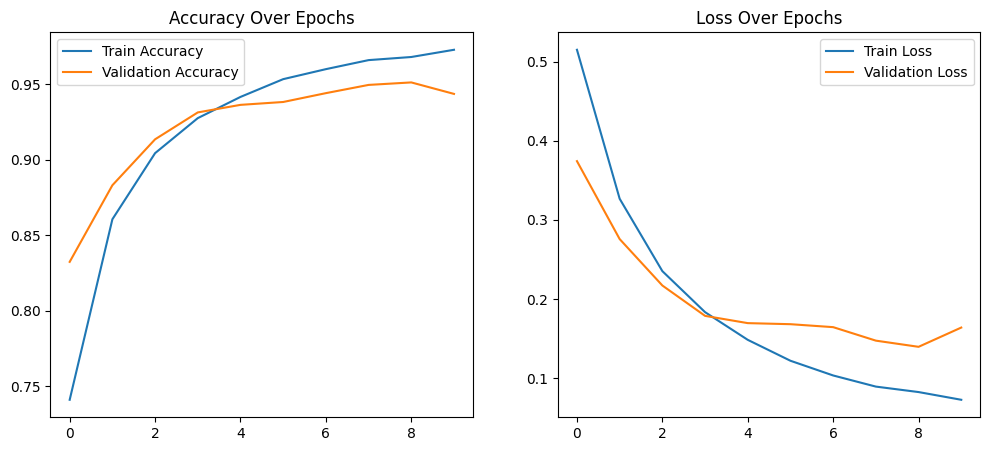

Model saved successfully!


In [25]:

# 📌 Step 7: Plot Training Performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# 📌 Step 8: Save the Trained Model
model.save("deepfake_detector_model.h5")
model.save("deepfake_detector_model.keras")
print("Model saved successfully!")

In [30]:
print(model.input_shape)  # This shows the expected input shape


(None, 128, 128, 3)


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))  # Resize to match model input
    img = img / 255.0  # Normalize if your model requires it
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 128, 128, 3)
    return img

In [33]:
image_path = "test1.jpg"  # Replace with actual image path
processed_image = preprocess_image(image_path)

print(processed_image.shape)  # Should be (1, 128, 128, 3)

prediction = model.predict(processed_image)[0]

label = "Deepfake" if np.argmax(prediction) == 1 else "Real"
print("Prediction:", label)


(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: Real
